In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
dataset = pd.read_csv('50_Startups.csv')
df = dataset.drop(columns = 'State',axis = '1', inplace = True)
dataset

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,NaN,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        47 non-null     float64
 1   Administration   47 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [28]:
dataset.dropna(inplace = True)

In [34]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        44 non-null     float64
 1   Administration   44 non-null     float64
 2   Marketing Spend  44 non-null     float64
 3   Profit           44 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [29]:
x = dataset.drop(columns ='Profit')
y = dataset['Profit']

In [30]:
x_train, x_test, y_train , y_test = train_test_split(x,y ,test_size = 0.2,random_state = 1)

In [44]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [45]:
knn.score(x_test ,y_test)

0.9128253867637333

In [43]:
y_pred = knn.predict(x_test)
y_pred[:5]

array([164186.8875, 174199.4025,  80920.6125,  89543.845 , 101876.03  ])

Text(0.5, 1.0, 'Confusion Matrix')

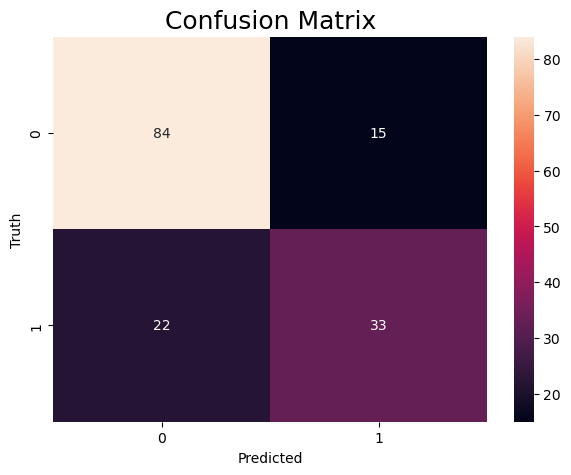

In [29]:
%matplotlib inline 
import seaborn as sns
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix',fontdict = {'size':18})

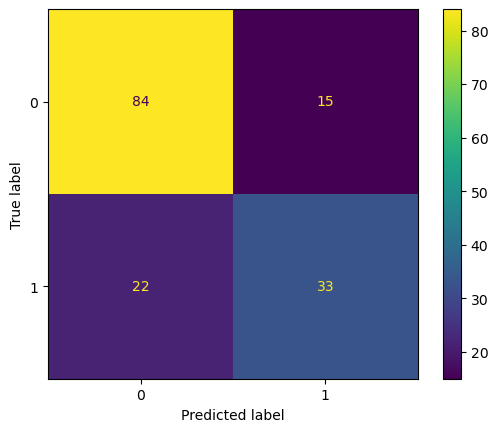

In [19]:
# ploting confusion matrix using matplotlib.pyplot
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

vis = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= knn.classes_)
vis.plot()
plt.show()

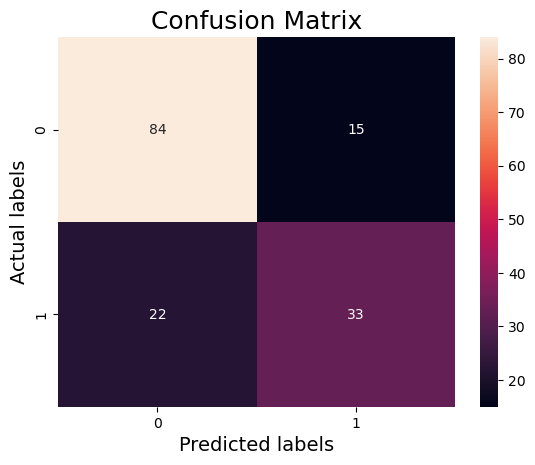

In [28]:
# ploting confusion matrix using seaborn
sns.heatmap(cm,annot= True, fmt = 'g', xticklabels = knn.classes_,yticklabels = knn.classes_)

plt.xlabel('Predicted labels',fontdict = {'size':14})
plt.ylabel('Actual labels',fontdict = {'size':14})
plt.title('Confusion Matrix',fontdict = {'size':18})
plt.show()

## har ek classifier ki performance ko hum confusion matrix se measure kar pate hai